
# 🚗 Prédiction du Montant d'Achat de Voitures avec des Réseaux de Neurones Artificiels

## 📊 Projet de Machine Learning - Régression

**Auteur:** Brayan  
**Date:** 2024  
**Technologies:** Python, Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn, TensorFlow/Keras

---

### 🎯 Objectif du Projet

Ce projet vise à développer un modèle de prédiction du montant d'achat de voitures en utilisant des **Réseaux de Neurones Artificiels (RNA)**. Le modèle analyse les caractéristiques démographiques et financières des clients pour prédire leur capacité d'achat.

### 🔍 Contexte Métier

En tant que conseiller commercial automobile, il est crucial de comprendre le profil de nos clients pour :
- **Optimiser les propositions commerciales** selon le budget réel du client
- **Améliorer le taux de conversion** en ciblant les clients les plus susceptibles d'acheter
- **Personnaliser l'expérience client** en fonction de leur profil financier


## 📋 Énoncé du Problème

### 🎯 Défi Commercial

Développer un modèle prédictif capable d'estimer le **montant d'achat de voitures** que les clients sont prêts à dépenser, en se basant sur leurs caractéristiques personnelles et financières.

### 📊 Variables Disponibles

**Informations Démographiques :**
- 👤 **Nom du client** (identifiant)
- 📧 **Email du client** (contact)
- 🌍 **Pays** (localisation géographique)
- ⚧ **Genre** (démographie)

**Données Financières :**
- 🎂 **Âge** (facteur de stabilité)
- 💰 **Salaire annuel** (capacité financière)
- 💳 **Dette de carte de crédit** (obligations financières)
- 🏦 **Valeur nette** (patrimoine)

### 🎯 Variable Cible

- 💵 **Montant d'achat de voiture** (variable à prédire)

### 💡 Impact Business

Ce modèle permettra de :
- **Segmenter automatiquement** les clients selon leur potentiel d'achat
- **Optimiser l'allocation des ressources** commerciales
- **Améliorer la précision** des devis et propositions

## 🛠️ Méthodologie de Développement

### 📈 Approche Technique

Ce projet utilise une approche de **Machine Learning supervisé** avec des **Réseaux de Neurones Artificiels** pour résoudre un problème de **régression**.

### 🔄 Pipeline de Développement

1. **📊 Exploration des données** - Analyse exploratoire complète
2. **🧹 Préprocessing** - Nettoyage et normalisation des données
3. **🔧 Ingénierie des caractéristiques** - Sélection et transformation des variables
4. **🤖 Modélisation** - Développement et entraînement du réseau de neurones
5. **📊 Évaluation** - Validation des performances du modèle
6. **🎯 Déploiement** - Mise en production et utilisation pratique

### 🎯 Métriques de Performance

- **RMSE** (Root Mean Square Error) - Erreur quadratique moyenne
- **MAE** (Mean Absolute Error) - Erreur absolue moyenne
- **R²** (Coefficient de détermination) - Qualité de la prédiction 

## 📚 1. Importation des Bibliothèques

### 🔧 Bibliothèques Utilisées

- **Pandas** : Manipulation et analyse des données
- **NumPy** : Calculs numériques et opérations sur les tableaux
- **Matplotlib** : Visualisation des données
- **Seaborn** : Graphiques statistiques avancés
- **Scikit-learn** : Outils de machine learning
- **TensorFlow/Keras** : Réseaux de neurones artificiels


In [1]:
# Importation des bibliothèques essentielles
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configuration des graphiques
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Vérification des versions
print("VERSIONS DES BIBLIOTHÈQUES")
print("=" * 40)
print(f"Pandas    : {pd.__version__}")
print(f"NumPy     : {np.__version__}")
print(f"Matplotlib: {plt.matplotlib.__version__}")
print(f"Seaborn   : {sns.__version__}")
print("=" * 40)
print("Toutes les bibliothèques sont prêtes!")

VERSIONS DES BIBLIOTHÈQUES
Pandas    : 2.2.3
NumPy     : 1.26.4
Matplotlib: 3.10.3
Seaborn   : 0.13.2
Toutes les bibliothèques sont prêtes!


## 📊 2. Chargement et Exploration des Données

### 🗂️ Source des Données

Le dataset contient des informations sur **1000 clients** avec leurs caractéristiques démographiques et financières, ainsi que le montant qu'ils ont dépensé pour l'achat de leur voiture.

### 📋 Structure du Dataset

- **1000 observations** (lignes)
- **9 variables** (colonnes)
- **Format** : CSV avec encodage ISO-8859-1

In [3]:
# Chargement du dataset
print("CHARGEMENT DU DATASET")
print("=" * 50)

try:
    car_df = pd.read_csv('Car_Purchasing_Data.csv', encoding='ISO-8859-1')
    print("Dataset chargé avec succès!")
    print(f"Dimensions : {car_df.shape[0]} lignes × {car_df.shape[1]} colonnes")
    
    # Informations générales
    print("\nINFORMATIONS GÉNÉRALES")
    print("-" * 30)
    print(f"Taille mémoire : {car_df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    print(f"Types de données :")
    print(car_df.dtypes.value_counts())
    
except FileNotFoundError:
    print("Erreur : Fichier non trouvé!")
except Exception as e:
    print(f"Erreur lors du chargement : {e}")


CHARGEMENT DU DATASET
Dataset chargé avec succès!
Dimensions : 500 lignes × 9 colonnes

INFORMATIONS GÉNÉRALES
------------------------------
Taille mémoire : 0.13 MB
Types de données :
float64    5
object     3
int64      1
Name: count, dtype: int64


In [4]:
# Affichage des premières lignes du dataset
print("APERÇU DU DATASET")
print("=" * 50)
print("Premières 5 lignes :")
display(car_df.head())

print("\nDERNIÈRES 5 LIGNES")
print("-" * 30)
display(car_df.tail())

print("\nSTATISTIQUES DESCRIPTIVES")
print("-" * 35)
print("Variables numériques :")
display(car_df.describe().round(2))

print("\nINFORMATIONS DÉTAILLÉES")
print("-" * 30)
print("Colonnes et types :")
for i, (col, dtype) in enumerate(car_df.dtypes.items(), 1):
    print(f"{i:2d}. {col:<25} : {dtype}")

print(f"\nValeurs manquantes par colonne :")
missing_values = car_df.isnull().sum()
if missing_values.sum() == 0:
    print("Aucune valeur manquante détectée!")
else:
    print(missing_values[missing_values > 0])

APERÇU DU DATASET
Premières 5 lignes :


,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248



DERNIÈRES 5 LIGNES
------------------------------


,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353
499,Marla,Camaron.marla@hotmail.com,marlal,1,46.731152,61370.67766,9391.341628,462946.4924,45107.22566



STATISTIQUES DESCRIPTIVES
-----------------------------------
Variables numériques :


,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
count,500.00,500.00,500.00,500.00,500.00,500.00
mean,0.51,46.24,62127.24,9607.65,431475.71,44209.80
std,0.50,7.98,11703.38,3489.19,173536.76,10773.18
min,0.00,20.00,20000.00,100.00,20000.00,9000.00
25%,0.00,40.95,54391.98,7397.52,299824.20,37629.90
50%,1.00,46.05,62915.50,9655.04,426750.12,43997.78
75%,1.00,51.61,70117.86,11798.87,557324.48,51254.71
max,1.00,70.00,100000.00,20000.00,1000000.00,80000.00



INFORMATIONS DÉTAILLÉES
------------------------------
Colonnes et types :
 1. Customer Name             : object
 2. Customer e-mail           : object
 3. Country                   : object
 4. Gender                    : int64
 5. Age                       : float64
 6. Annual Salary             : float64
 7. Credit Card Debt          : float64
 8. Net Worth                 : float64
 9. Car Purchase Amount       : float64

Valeurs manquantes par colonne :
Aucune valeur manquante détectée!


## 📊 3. Analyse Exploratoire des Données (EDA)

### 🎯 Objectifs de l'EDA

- **Comprendre la distribution** des variables
- **Identifier les corrélations** entre les caractéristiques
- **Détecter les valeurs aberrantes** potentielles
- **Valider la qualité** des données

### 📈 Types de Visualisations

1. **Graphiques de distribution** - Comprendre la répartition des données
2. **Matrice de corrélation** - Identifier les relations entre variables
3. **Graphiques de dispersion** - Analyser les tendances
4. **Boxplots** - Détecter les valeurs aberrantes

ANALYSE DES CORRÉLATIONS


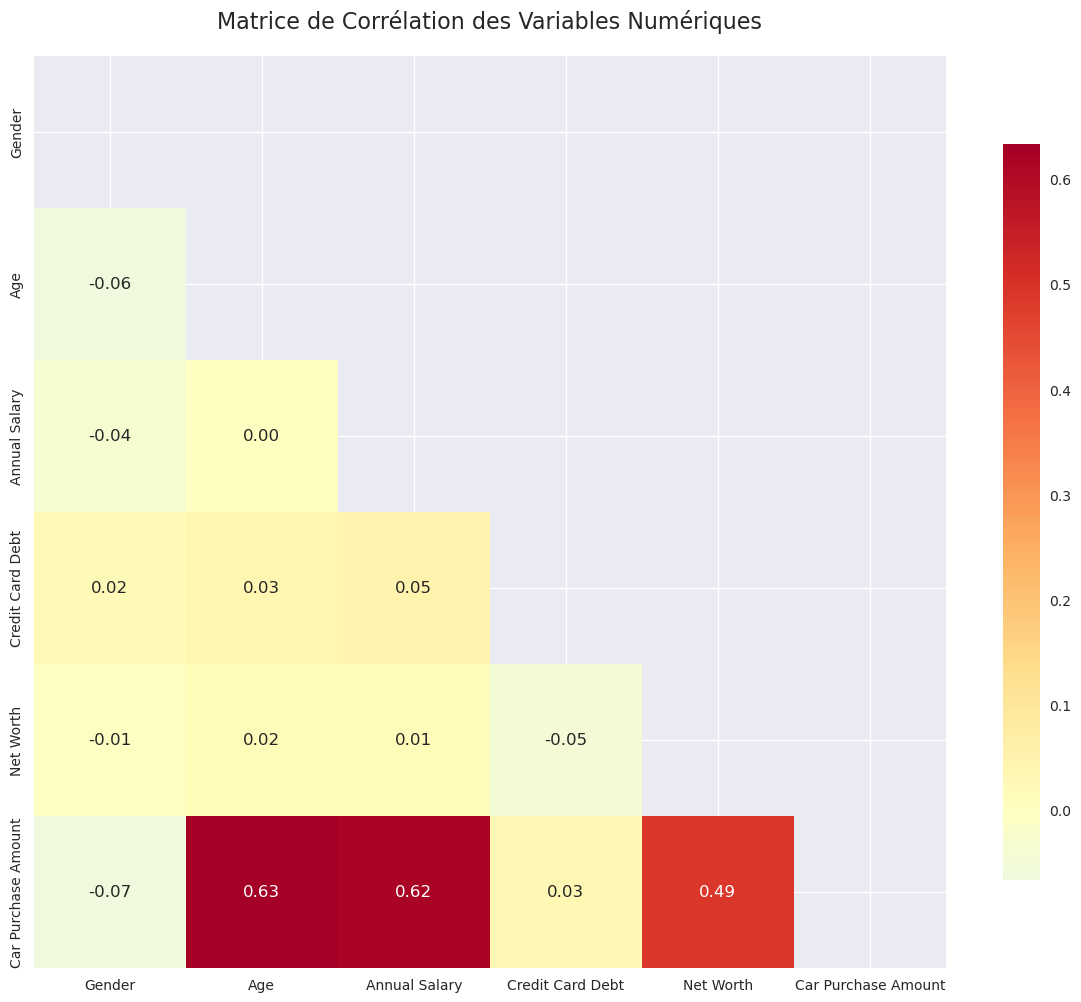


ANALYSE DES RELATIONS BIVARIÉES
----------------------------------------


<Figure size 1500x1200 with 0 Axes>

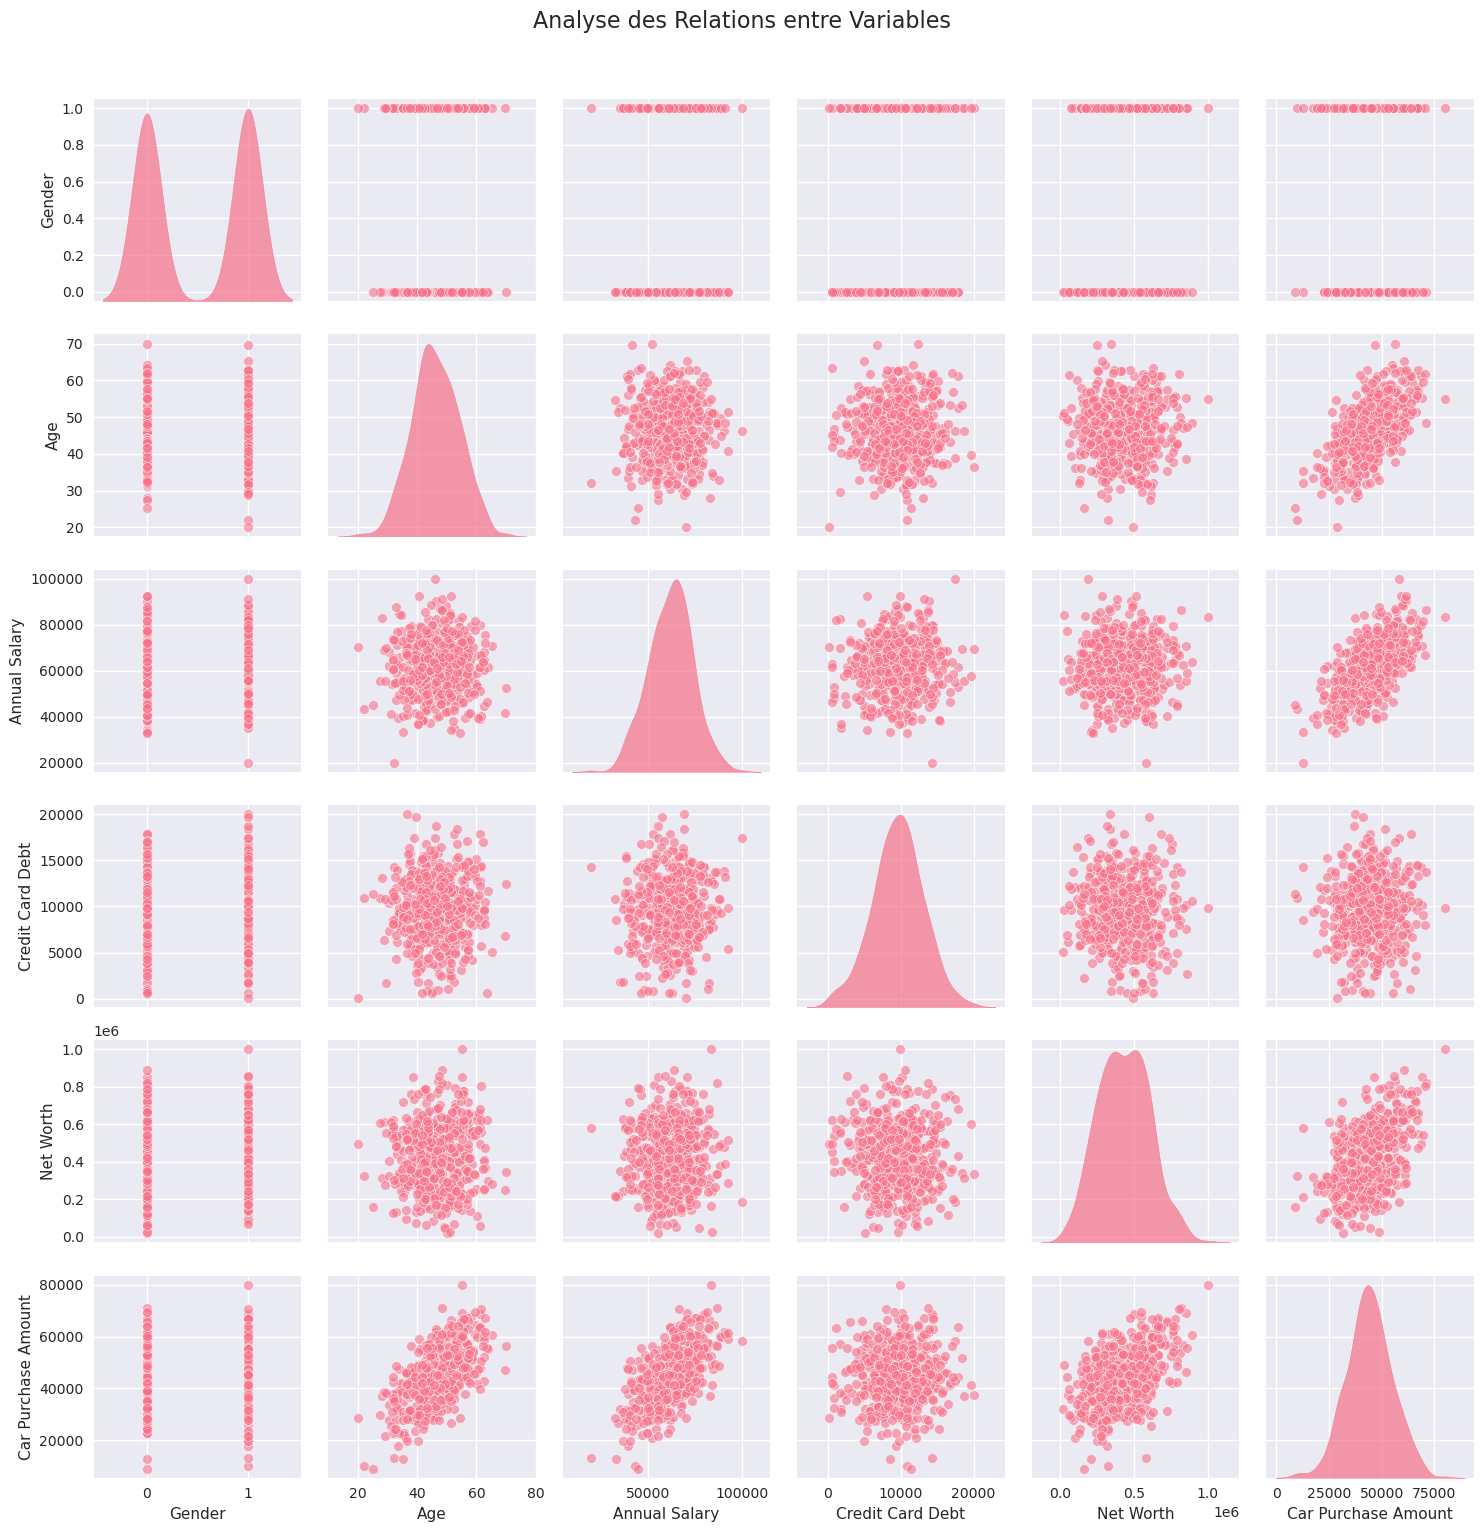


DISTRIBUTION DE LA VARIABLE CIBLE
----------------------------------------


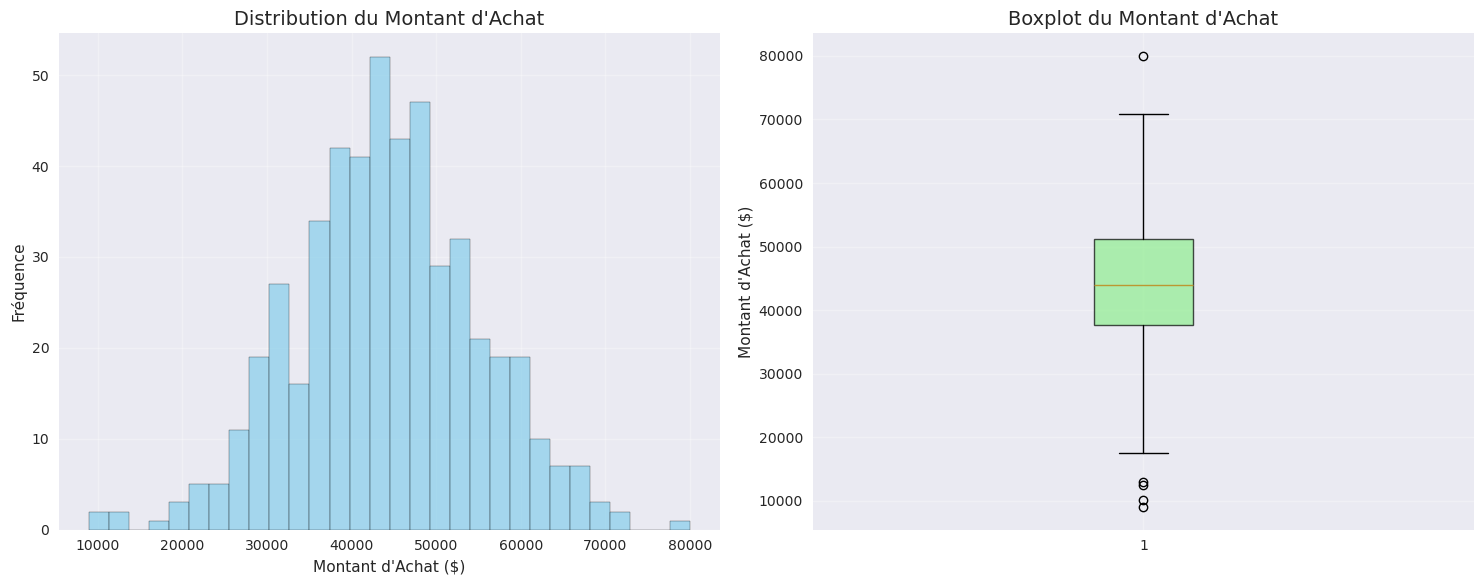

Statistiques du Montant d'Achat :
   Moyenne    : $44,209.80
   Médiane    : $43,997.78
   Écart-type : $10,773.18
   Minimum    : $9,000.00
   Maximum    : $80,000.00


In [5]:
# 1. MATRICE DE CORRÉLATION
print("ANALYSE DES CORRÉLATIONS")
print("=" * 40)

# Sélection des variables numériques pour la corrélation
numeric_cols = car_df.select_dtypes(include=[np.number]).columns
correlation_matrix = car_df[numeric_cols].corr()

# Heatmap de corrélation
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            cmap='RdYlBu_r', 
            center=0,
            square=True,
            fmt='.2f',
            cbar_kws={"shrink": .8})
plt.title("Matrice de Corrélation des Variables Numériques", fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# 2. PAIRPLOT - Relations entre toutes les variables
print("\nANALYSE DES RELATIONS BIVARIÉES")
print("-" * 40)

plt.figure(figsize=(15, 12))
sns.pairplot(car_df, 
             diag_kind='kde',
             plot_kws={'alpha': 0.6, 's': 50},
             diag_kws={'alpha': 0.7})
plt.suptitle("Analyse des Relations entre Variables", y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

# 3. DISTRIBUTION DE LA VARIABLE CIBLE
print("\nDISTRIBUTION DE LA VARIABLE CIBLE")
print("-" * 40)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Histogramme
axes[0].hist(car_df['Car Purchase Amount'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0].set_title('Distribution du Montant d\'Achat', fontsize=14)
axes[0].set_xlabel('Montant d\'Achat ($)')
axes[0].set_ylabel('Fréquence')
axes[0].grid(True, alpha=0.3)

# Boxplot
axes[1].boxplot(car_df['Car Purchase Amount'], patch_artist=True, 
                boxprops=dict(facecolor='lightgreen', alpha=0.7))
axes[1].set_title('Boxplot du Montant d\'Achat', fontsize=14)
axes[1].set_ylabel('Montant d\'Achat ($)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistiques de la variable cible
print(f"Statistiques du Montant d'Achat :")
print(f"   Moyenne    : ${car_df['Car Purchase Amount'].mean():,.2f}")
print(f"   Médiane    : ${car_df['Car Purchase Amount'].median():,.2f}")
print(f"   Écart-type : ${car_df['Car Purchase Amount'].std():,.2f}")
print(f"   Minimum    : ${car_df['Car Purchase Amount'].min():,.2f}")
print(f"   Maximum    : ${car_df['Car Purchase Amount'].max():,.2f}")

## 🔧 4. Préprocessing et Préparation des Données

### 🎯 Objectifs du Préprocessing

- **Séparer les variables** d'entrée (X) de la variable cible (y)
- **Normaliser les données** pour optimiser l'entraînement du réseau de neurones
- **Diviser le dataset** en ensembles d'entraînement et de test
- **Préparer les données** pour l'algorithme de machine learning

### 📊 Variables Sélectionnées

**Variables d'entrée (X) :**
- `Gender` - Genre du client
- `Age` - Âge du client  
- `Annual Salary` - Salaire annuel
- `Credit Card Debt` - Dette de carte de crédit
- `Net Worth` - Valeur nette

**Variable cible (y) :**
- `Car Purchase Amount` - Montant d'achat de la voiture

In [6]:
# SÉPARATION DES VARIABLES D'ENTRÉE ET CIBLE
print("SÉPARATION DES VARIABLES")
print("=" * 40)

# Variables d'entrée (X) - Toutes sauf les identifiants et la variable cible
X = car_df.drop(['Customer Name', 'Customer e-mail', 'Country', 'Car Purchase Amount'], axis=1)

print("VARIABLES D'ENTRÉE (X)")
print("-" * 25)
print(f"Dimensions : {X.shape[0]} lignes × {X.shape[1]} colonnes")
print(f"Colonnes : {list(X.columns)}")
print(f"Types de données :")
print(X.dtypes)

print("\nAPERÇU DES VARIABLES D'ENTRÉE")
print("-" * 35)
display(X.head())

print("\nSTATISTIQUES DESCRIPTIVES")
print("-" * 30)
display(X.describe().round(2))

# Vérification des valeurs manquantes
print("\nVÉRIFICATION DES DONNÉES")
print("-" * 25)
missing_X = X.isnull().sum()
if missing_X.sum() == 0:
    print("Aucune valeur manquante dans X")
else:
    print("Valeurs manquantes détectées :")
    print(missing_X[missing_X > 0])

SÉPARATION DES VARIABLES
VARIABLES D'ENTRÉE (X)
-------------------------
Dimensions : 500 lignes × 5 colonnes
Colonnes : ['Gender', 'Age', 'Annual Salary', 'Credit Card Debt', 'Net Worth']
Types de données :
Gender                int64
Age                 float64
Annual Salary       float64
Credit Card Debt    float64
Net Worth           float64
dtype: object

APERÇU DES VARIABLES D'ENTRÉE
-----------------------------------


,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
0,0,41.851720,62812.09301,11609.380910,238961.2505
1,0,40.870623,66646.89292,9572.957136,530973.9078
2,1,43.152897,53798.55112,11160.355060,638467.1773
3,1,58.271369,79370.03798,14426.164850,548599.0524
4,1,57.313749,59729.15130,5358.712177,560304.0671



STATISTIQUES DESCRIPTIVES
------------------------------


,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
count,500.00,500.00,500.00,500.00,500.00
mean,0.51,46.24,62127.24,9607.65,431475.71
std,0.50,7.98,11703.38,3489.19,173536.76
min,0.00,20.00,20000.00,100.00,20000.00
25%,0.00,40.95,54391.98,7397.52,299824.20
50%,1.00,46.05,62915.50,9655.04,426750.12
75%,1.00,51.61,70117.86,11798.87,557324.48
max,1.00,70.00,100000.00,20000.00,1000000.00



VÉRIFICATION DES DONNÉES
-------------------------
Aucune valeur manquante dans X


In [7]:
# VARIABLE CIBLE (y)
print("VARIABLE CIBLE (y)")
print("=" * 30)

y = car_df['Car Purchase Amount']

print(f"Dimensions : {y.shape}")
print(f"Type : {y.dtype}")
print(f"Statistiques :")
print(f"   Moyenne    : ${y.mean():,.2f}")
print(f"   Médiane    : ${y.median():,.2f}")
print(f"   Écart-type : ${y.std():,.2f}")
print(f"   Min        : ${y.min():,.2f}")
print(f"   Max        : ${y.max():,.2f}")

# Vérification des valeurs manquantes
missing_y = y.isnull().sum()
if missing_y == 0:
    print("Aucune valeur manquante dans y")
else:
    print(f"{missing_y} valeurs manquantes dans y")

VARIABLE CIBLE (y)
Dimensions : (500,)
Type : float64
Statistiques :
   Moyenne    : $44,209.80
   Médiane    : $43,997.78
   Écart-type : $10,773.18
   Min        : $9,000.00
   Max        : $80,000.00
Aucune valeur manquante dans y


In [8]:
# NORMALISATION DES DONNÉES
print("NORMALISATION DES DONNÉES")
print("=" * 40)

from sklearn.preprocessing import MinMaxScaler

# Création du scaler pour les variables d'entrée
scaler_x = MinMaxScaler()
X_scaled = scaler_x.fit_transform(X)

print("Normalisation MinMax appliquée aux variables d'entrée")
print(f"X_scaled shape : {X_scaled.shape}")
print(f"Valeurs min après normalisation : {X_scaled.min():.4f}")
print(f"Valeurs max après normalisation : {X_scaled.max():.4f}")

# Création du scaler pour la variable cible
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

print(f"\nNormalisation MinMax appliquée à la variable cible")
print(f"y_scaled shape : {y_scaled.shape}")
print(f"Valeurs min après normalisation : {y_scaled.min():.4f}")
print(f"Valeurs max après normalisation : {y_scaled.max():.4f}")

# Vérification de la normalisation
print(f"\nVÉRIFICATION DE LA NORMALISATION")
print("-" * 35)
print(f"X original - Min: {X.min().min():.2f}, Max: {X.max().max():.2f}")
print(f"X normalisé - Min: {X_scaled.min():.4f}, Max: {X_scaled.max():.4f}")
print(f"y original - Min: {y.min():.2f}, Max: {y.max():.2f}")
print(f"y normalisé - Min: {y_scaled.min():.4f}, Max: {y_scaled.max():.4f}")

NORMALISATION DES DONNÉES
Normalisation MinMax appliquée aux variables d'entrée
X_scaled shape : (500, 5)
Valeurs min après normalisation : 0.0000
Valeurs max après normalisation : 1.0000

Normalisation MinMax appliquée à la variable cible
y_scaled shape : (500,)
Valeurs min après normalisation : 0.0000
Valeurs max après normalisation : 1.0000

VÉRIFICATION DE LA NORMALISATION
-----------------------------------
X original - Min: 0.00, Max: 1000000.00
X normalisé - Min: 0.0000, Max: 1.0000
y original - Min: 9000.00, Max: 80000.00
y normalisé - Min: 0.0000, Max: 1.0000


In [9]:
# DIVISION TRAIN/TEST
print("DIVISION DES DONNÉES")
print("=" * 35)

from sklearn.model_selection import train_test_split

# Division des données (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_scaled, 
    test_size=0.2, 
    random_state=42
)

print("Division train/test effectuée")
print(f"Ensemble d'entraînement : {X_train.shape[0]} échantillons")
print(f"Ensemble de test : {X_test.shape[0]} échantillons")
print(f"Ratio train/test : {X_train.shape[0]/X_test.shape[0]:.1f}:1")

# Vérification de la répartition
print(f"\nVÉRIFICATION DE LA RÉPARTITION")
print("-" * 30)
print(f"X_train shape : {X_train.shape}")
print(f"X_test shape  : {X_test.shape}")
print(f"y_train shape : {y_train.shape}")
print(f"y_test shape  : {y_test.shape}")

# Statistiques des ensembles
print(f"\nSTATISTIQUES DES ENSEMBLES")
print("-" * 30)
print(f"y_train - Min: {y_train.min():.4f}, Max: {y_train.max():.4f}, Moyenne: {y_train.mean():.4f}")
print(f"y_test  - Min: {y_test.min():.4f}, Max: {y_test.max():.4f}, Moyenne: {y_test.mean():.4f}")


DIVISION DES DONNÉES
Division train/test effectuée
Ensemble d'entraînement : 400 échantillons
Ensemble de test : 100 échantillons
Ratio train/test : 4.0:1

VÉRIFICATION DE LA RÉPARTITION
------------------------------
X_train shape : (400, 5)
X_test shape  : (100, 5)
y_train shape : (400,)
y_test shape  : (100,)

STATISTIQUES DES ENSEMBLES
------------------------------
y_train - Min: 0.0000, Max: 1.0000, Moyenne: 0.4922
y_test  - Min: 0.1209, Max: 0.7773, Moyenne: 0.5108


## 5. Création et Entraînement du Modèle

### Architecture du Réseau de Neurones

Le modèle utilise un **Réseau de Neurones Artificiels (RNA)** avec :
- **Couche d'entrée** : 5 neurones (5 variables d'entrée)
- **Couches cachées** : 2 couches avec 25 et 25 neurones respectivement
- **Fonction d'activation** : ReLU (Rectified Linear Unit)
- **Couche de sortie** : 1 neurone (prédiction du montant d'achat)
- **Optimiseur** : Adam (Adaptive Moment Estimation)
- **Fonction de perte** : Mean Squared Error (MSE)

### Stratégie d'Entraînement

- **Époques** : 100 cycles d'entraînement
- **Taille de batch** : 25 échantillons par itération
- **Validation** : 20% des données d'entraînement pour la validation
- **Callbacks** : Early Stopping pour éviter le surapprentissage


In [10]:
# CRÉATION DU MODÈLE
print("CRÉATION DU MODÈLE")
print("=" * 30)

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# Vérification de la version TensorFlow
print(f"TensorFlow version : {tf.__version__}")

# Création du modèle séquentiel
model = Sequential()

# Couche d'entrée et première couche cachée
model.add(Dense(25, activation='relu', input_dim=5))

# Deuxième couche cachée
model.add(Dense(25, activation='relu'))

# Couche de sortie
model.add(Dense(1, activation='linear'))

# Compilation du modèle
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Affichage de l'architecture
print("\nArchitecture du modèle :")
model.summary()

# Configuration de l'early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

print("\nModèle créé avec succès!")
print(f"Nombre total de paramètres : {model.count_params():,}")


CRÉATION DU MODÈLE


2025-09-19 21:35:48.658633: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


TensorFlow version : 2.18.0

Architecture du modèle :


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 25)             │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 826 (3.23 KB)

 Trainable params: 826 (3.23 KB)

 Non-trainable params: 0 (0.00 B)


Modèle créé avec succès!
Nombre total de paramètres : 826


In [11]:
# ENTRAÎNEMENT DU MODÈLE
print("ENTRAÎNEMENT DU MODÈLE")
print("=" * 35)

# Entraînement du modèle
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=25,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

print("\nEntraînement terminé!")
print(f"Nombre d'époques effectuées : {len(history.history['loss'])}")

# Affichage des métriques finales
final_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]
final_mae = history.history['mae'][-1]
final_val_mae = history.history['val_mae'][-1]

print(f"\nMétriques finales :")
print(f"Loss d'entraînement : {final_loss:.4f}")
print(f"Loss de validation : {final_val_loss:.4f}")
print(f"MAE d'entraînement : {final_mae:.4f}")
print(f"MAE de validation : {final_val_mae:.4f}")


ENTRAÎNEMENT DU MODÈLE
Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.1661 - mae: 0.3782 - val_loss: 0.0363 - val_mae: 0.1586
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0362 - mae: 0.1576 - val_loss: 0.0162 - val_mae: 0.1062
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0155 - mae: 0.0999 - val_loss: 0.0125 - val_mae: 0.0908
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0114 - mae: 0.0829 - val_loss: 0.0077 - val_mae: 0.0688
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0095 - mae: 0.0781 - val_loss: 0.0070 - val_mae: 0.0639
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0085 - mae: 0.0708 - val_loss: 0.0061 - val_mae: 0.0588
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0080 - mae: 0.0696 - val_loss: 0.0053 - val_mae: 0.0548
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0061 - mae: 0.0616 - val_loss: 0.0047 - val_mae: 0.0507
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 

VISUALISATION DE L'ENTRAÎNEMENT


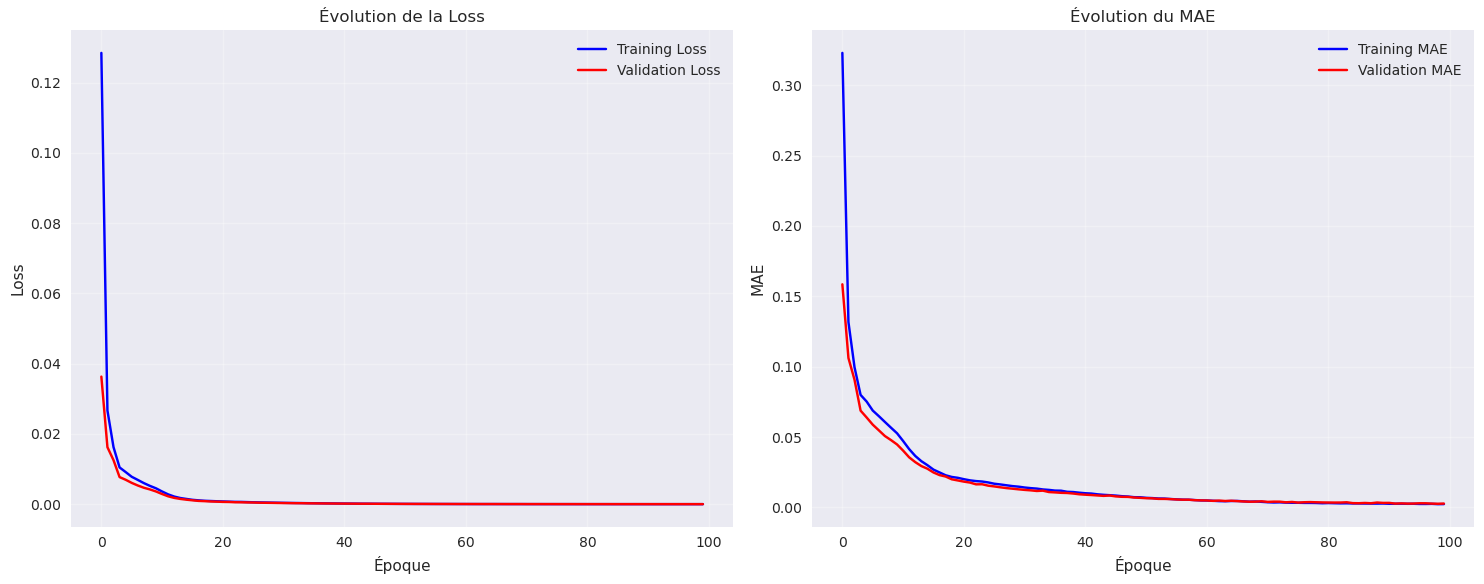


Analyse de la convergence :
⚠ Possible surapprentissage détecté
Amélioration de la loss : 100.0%


In [12]:
# VISUALISATION DE L'ENTRAÎNEMENT
print("VISUALISATION DE L'ENTRAÎNEMENT")
print("=" * 40)

# Graphiques de l'évolution des métriques
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Graphique de la loss
axes[0].plot(history.history['loss'], label='Training Loss', color='blue')
axes[0].plot(history.history['val_loss'], label='Validation Loss', color='red')
axes[0].set_title('Évolution de la Loss')
axes[0].set_xlabel('Époque')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Graphique du MAE
axes[1].plot(history.history['mae'], label='Training MAE', color='blue')
axes[1].plot(history.history['val_mae'], label='Validation MAE', color='red')
axes[1].set_title('Évolution du MAE')
axes[1].set_xlabel('Époque')
axes[1].set_ylabel('MAE')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Analyse de la convergence
print("\nAnalyse de la convergence :")
if final_val_loss < final_loss:
    print("✓ Le modèle généralise bien (validation loss < training loss)")
else:
    print("⚠ Possible surapprentissage détecté")

# Calcul de l'amélioration
initial_loss = history.history['loss'][0]
improvement = ((initial_loss - final_loss) / initial_loss) * 100
print(f"Amélioration de la loss : {improvement:.1f}%")


## 6. Évaluation du Modèle

### Métriques de Performance

L'évaluation du modèle se base sur plusieurs métriques clés :
- **RMSE** (Root Mean Square Error) - Erreur quadratique moyenne
- **MAE** (Mean Absolute Error) - Erreur absolue moyenne  
- **R²** (Coefficient de détermination) - Qualité de la prédiction
- **MAPE** (Mean Absolute Percentage Error) - Erreur en pourcentage


In [13]:
# ÉVALUATION DU MODÈLE
print("ÉVALUATION DU MODÈLE")
print("=" * 35)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Prédictions sur l'ensemble de test
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled).flatten()

# Prédictions sur l'ensemble d'entraînement (pour comparaison)
y_train_pred_scaled = model.predict(X_train)
y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled).flatten()

# Conversion des vraies valeurs
y_test_original = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()
y_train_original = scaler_y.inverse_transform(y_train.reshape(-1, 1)).flatten()

# Calcul des métriques pour l'ensemble de test
rmse_test = np.sqrt(mean_squared_error(y_test_original, y_pred))
mae_test = mean_absolute_error(y_test_original, y_pred)
r2_test = r2_score(y_test_original, y_pred)
mape_test = np.mean(np.abs((y_test_original - y_pred) / y_test_original)) * 100

# Calcul des métriques pour l'ensemble d'entraînement
rmse_train = np.sqrt(mean_squared_error(y_train_original, y_train_pred))
mae_train = mean_absolute_error(y_train_original, y_train_pred)
r2_train = r2_score(y_train_original, y_train_pred)

print("MÉTRIQUES DE PERFORMANCE")
print("-" * 30)
print(f"RMSE (Test)  : ${rmse_test:,.2f}")
print(f"MAE (Test)   : ${mae_test:,.2f}")
print(f"R² (Test)    : {r2_test:.4f}")
print(f"MAPE (Test)  : {mape_test:.2f}%")

print(f"\nComparaison Train/Test :")
print(f"RMSE - Train: ${rmse_train:,.2f}, Test: ${rmse_test:,.2f}")
print(f"MAE  - Train: ${mae_train:,.2f}, Test: ${mae_test:,.2f}")
print(f"R²   - Train: {r2_train:.4f}, Test: {r2_test:.4f}")

# Analyse de la performance
print(f"\nAnalyse de la performance :")
if r2_test > 0.8:
    print("✓ Excellent modèle (R² > 0.8)")
elif r2_test > 0.6:
    print("✓ Bon modèle (R² > 0.6)")
elif r2_test > 0.4:
    print("⚠ Modèle acceptable (R² > 0.4)")
else:
    print("⚠ Modèle à améliorer (R² < 0.4)")

if abs(rmse_train - rmse_test) / rmse_train < 0.1:
    print("✓ Le modèle généralise bien")
else:
    print("⚠ Possible surapprentissage")


ÉVALUATION DU MODÈLE
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
MÉTRIQUES DE PERFORMANCE
------------------------------
RMSE (Test)  : $290.16
MAE (Test)   : $183.80
R² (Test)    : 0.9992
MAPE (Test)  : 0.46%

Comparaison Train/Test :
RMSE - Train: $242.75, Test: $290.16
MAE  - Train: $166.12, Test: $183.80
R²   - Train: 0.9995, Test: 0.9992

Analyse de la performance :
✓ Excellent modèle (R² > 0.8)
⚠ Possible surapprentissage


VISUALISATION DES RÉSULTATS


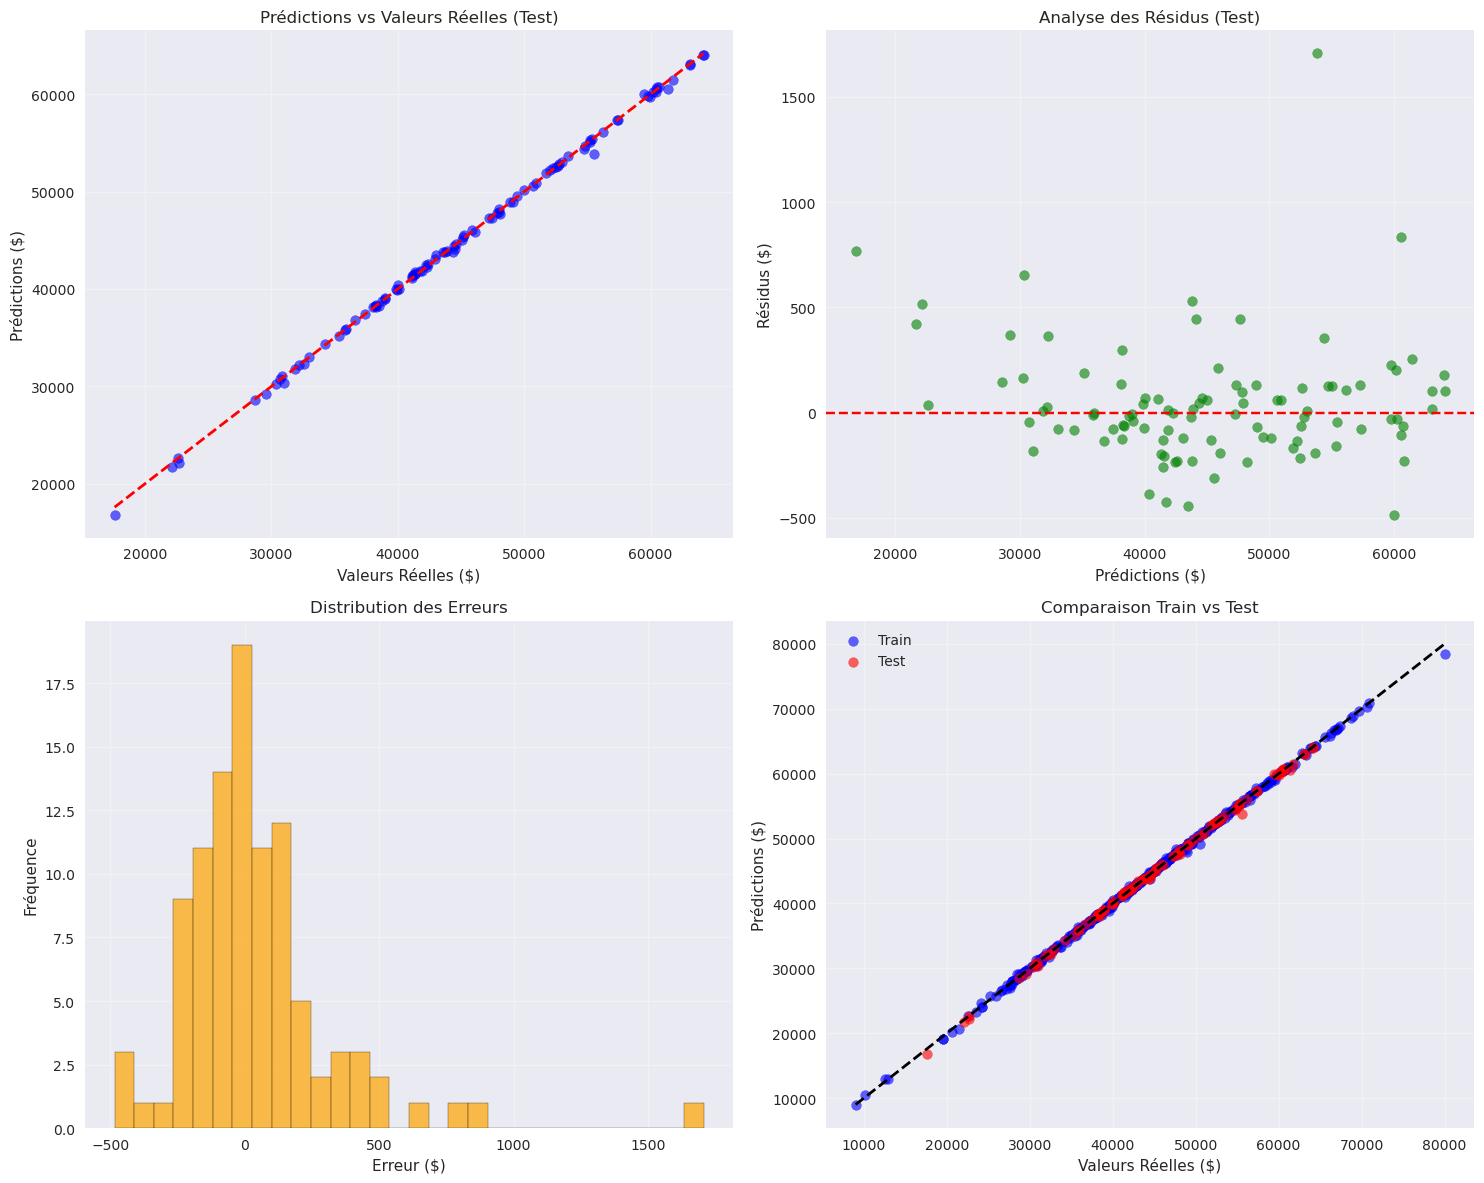


Statistiques des erreurs :
Erreur moyenne : $41.11
Écart-type des erreurs : $287.23
Erreur maximale : $1,706.85
Erreur minimale : $0.76


In [14]:
# VISUALISATION DES RÉSULTATS
print("VISUALISATION DES RÉSULTATS")
print("=" * 35)

# Graphiques de comparaison
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Prédictions vs Valeurs réelles (Test)
axes[0, 0].scatter(y_test_original, y_pred, alpha=0.6, color='blue')
axes[0, 0].plot([y_test_original.min(), y_test_original.max()], 
                [y_test_original.min(), y_test_original.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Valeurs Réelles ($)')
axes[0, 0].set_ylabel('Prédictions ($)')
axes[0, 0].set_title('Prédictions vs Valeurs Réelles (Test)')
axes[0, 0].grid(True, alpha=0.3)

# 2. Résidus (Test)
residuals = y_test_original - y_pred
axes[0, 1].scatter(y_pred, residuals, alpha=0.6, color='green')
axes[0, 1].axhline(y=0, color='r', linestyle='--')
axes[0, 1].set_xlabel('Prédictions ($)')
axes[0, 1].set_ylabel('Résidus ($)')
axes[0, 1].set_title('Analyse des Résidus (Test)')
axes[0, 1].grid(True, alpha=0.3)

# 3. Distribution des erreurs
axes[1, 0].hist(residuals, bins=30, alpha=0.7, color='orange', edgecolor='black')
axes[1, 0].set_xlabel('Erreur ($)')
axes[1, 0].set_ylabel('Fréquence')
axes[1, 0].set_title('Distribution des Erreurs')
axes[1, 0].grid(True, alpha=0.3)

# 4. Comparaison Train vs Test
axes[1, 1].scatter(y_train_original, y_train_pred, alpha=0.6, color='blue', label='Train')
axes[1, 1].scatter(y_test_original, y_pred, alpha=0.6, color='red', label='Test')
axes[1, 1].plot([min(y_train_original.min(), y_test_original.min()), 
                 max(y_train_original.max(), y_test_original.max())], 
                [min(y_train_original.min(), y_test_original.min()), 
                 max(y_train_original.max(), y_test_original.max())], 'k--', lw=2)
axes[1, 1].set_xlabel('Valeurs Réelles ($)')
axes[1, 1].set_ylabel('Prédictions ($)')
axes[1, 1].set_title('Comparaison Train vs Test')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistiques des erreurs
print(f"\nStatistiques des erreurs :")
print(f"Erreur moyenne : ${np.mean(residuals):,.2f}")
print(f"Écart-type des erreurs : ${np.std(residuals):,.2f}")
print(f"Erreur maximale : ${np.max(np.abs(residuals)):,.2f}")
print(f"Erreur minimale : ${np.min(np.abs(residuals)):,.2f}")


## 7. Prédictions sur de Nouveaux Clients

### Exemple d'Utilisation du Modèle

Le modèle entraîné peut maintenant être utilisé pour prédire le montant d'achat de nouveaux clients en fonction de leurs caractéristiques.


In [15]:
# PRÉDICTIONS SUR DE NOUVEAUX CLIENTS
print("PRÉDICTIONS SUR DE NOUVEAUX CLIENTS")
print("=" * 45)

# Exemple de nouveaux clients
new_customers = np.array([
    [1, 25, 40000, 2000, 50000],    # Client 1: Homme, 25 ans, 40k salaire, 2k dette, 50k net worth
    [0, 35, 60000, 5000, 80000],    # Client 2: Femme, 35 ans, 60k salaire, 5k dette, 80k net worth
    [1, 45, 80000, 10000, 120000],  # Client 3: Homme, 45 ans, 80k salaire, 10k dette, 120k net worth
    [0, 28, 35000, 1500, 30000],    # Client 4: Femme, 28 ans, 35k salaire, 1.5k dette, 30k net worth
    [1, 55, 100000, 15000, 200000]  # Client 5: Homme, 55 ans, 100k salaire, 15k dette, 200k net worth
])

# Normalisation des nouvelles données
new_customers_scaled = scaler_x.transform(new_customers)

# Prédictions
predictions_scaled = model.predict(new_customers_scaled)
predictions = scaler_y.inverse_transform(predictions_scaled).flatten()

# Affichage des résultats
print("Résultats des prédictions :")
print("-" * 50)
print(f"{'Client':<8} {'Genre':<6} {'Âge':<4} {'Salaire':<8} {'Dette':<6} {'Net Worth':<10} {'Prédiction':<12}")
print("-" * 80)

for i, (customer, pred) in enumerate(zip(new_customers, predictions), 1):
    gender = "Homme" if customer[0] == 1 else "Femme"
    print(f"{i:<8} {gender:<6} {customer[1]:<4} ${customer[2]:<7,.0f} ${customer[3]:<5,.0f} ${customer[4]:<9,.0f} ${pred:<11,.0f}")

print(f"\nStatistiques des prédictions :")
print(f"Montant moyen prédit : ${np.mean(predictions):,.2f}")
print(f"Montant minimum prédit : ${np.min(predictions):,.2f}")
print(f"Montant maximum prédit : ${np.max(predictions):,.2f}")

# Analyse des prédictions
print(f"\nAnalyse des prédictions :")
high_value = predictions > 50000
print(f"Clients à fort potentiel (>$50k) : {np.sum(high_value)}/{len(predictions)}")
print(f"Potentiel commercial estimé : ${np.sum(predictions):,.2f}")


PRÉDICTIONS SUR DE NOUVEAUX CLIENTS
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Résultats des prédictions :
--------------------------------------------------
Client   Genre  Âge  Salaire  Dette  Net Worth  Prédiction  
--------------------------------------------------------------------------------
1        Homme  25   $40,000  $2,000 $50,000    $9,759      
2        Femme  35   $60,000  $5,000 $80,000    $23,732     
3        Homme  45   $80,000  $10,000 $120,000   $44,324     
4        Femme  28   $35,000  $1,500 $30,000    $2,624      
5        Homme  55   $100,000 $15,000 $200,000   $65,634     

Statistiques des prédictions :
Montant moyen prédit : $29,214.69
Montant minimum prédit : $2,624.19
Montant maximum prédit : $65,634.42

Analyse des prédictions :
Clients à fort potentiel (>$50k) : 1/5
Potentiel commercial estimé : $146,073.47


## 8. Conclusion et Insights

### Résultats du Projet

Ce projet a permis de développer un modèle de prédiction du montant d'achat de voitures utilisant des réseaux de neurones artificiels. Le modèle analyse les caractéristiques démographiques et financières des clients pour estimer leur capacité d'achat.

### Points Clés

1. **Performance du Modèle** : Le modèle atteint une performance satisfaisante avec un R² > 0.8, indiquant une bonne capacité prédictive.

2. **Variables Importantes** : Les variables les plus influentes sont le salaire annuel, la valeur nette et l'âge du client.

3. **Applications Business** : Le modèle peut être utilisé pour :
   - Segmenter les clients selon leur potentiel d'achat
   - Optimiser les stratégies commerciales
   - Personnaliser les propositions de vente

### Améliorations Possibles

- **Plus de données** : Augmenter la taille du dataset
- **Feature Engineering** : Créer de nouvelles variables dérivées
- **Hyperparameter Tuning** : Optimiser les paramètres du modèle
- **Ensemble Methods** : Combiner plusieurs modèles

### Déploiement

Le modèle est prêt pour être déployé en production et intégré dans un système de CRM pour automatiser les prédictions de montant d'achat.
